## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Sotiris Ftiakas"
AEM = "3076"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
# BEGIN CODE HERE

X,y = load_breast_cancer(return_X_y = True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=RANDOM_VARIABLE)

#END CODE HERE

In [4]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [5]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion="gini",random_state=RANDOM_VARIABLE).fit(X_train,y_train)
classifier_igain = DecisionTreeClassifier(criterion="entropy",random_state=RANDOM_VARIABLE).fit(X_train,y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test,prediction_gini)
f_measure_igain = f1_score(y_test,prediction_igain)

#END CODE HERE

In [6]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [7]:
# BEGIN CODE HERE
depth = classifier_gini.tree_.max_depth
fscores_train = []
fscores_test = []

for i in range (1,depth+1):
    gini = DecisionTreeClassifier(criterion="gini",random_state=RANDOM_VARIABLE,max_depth=i).fit(X_train,y_train)
    pred_gini = gini.predict(X_train)
    f_gini = f1_score(y_train,pred_gini)
    
    fscores_train.append(f_gini)
    
    gini = DecisionTreeClassifier(criterion="gini",random_state=RANDOM_VARIABLE,max_depth=i).fit(X_train,y_train)
    pred_gini = gini.predict(X_test)
    f_gini = f1_score(y_test,pred_gini)
    
    fscores_test.append(f_gini)
    


#END CODE HERE

In [8]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

There are **two(2)** things we can notice on the results.

**1)** On the **train-f1_scores** list, as we keep on incrementing the max allowed tree depth, at one point we can see that the f1_score is approaching and finally achieving 100% accuracy, meaning that we have completely overfitted our model to the training dataset.

**2)** On the **test-f1_scores** list, as we keep on incrementing the max allowed tree depth, at one point we can see that the f1_score starts to fall, meaning that our model is losing accuracy. This means as well, that we have an overfitting problem after a specific tree depth.

To choose the max_depth of a model, a good pre-prunning technique is to **use a condition** which will require a node to have a **minimum amount of points before splitting.** 
Other than that, there is always the option of **trial and error**, where we can try different depths for our model and see which one gives us the best possible accuracy, while avoiding overfitting.

In [9]:
# #THATS A TESTING CELL

# # BEGIN CODE HERE
# income = pd.read_csv("income.csv")
# income_test = pd.read_csv("income_test.csv")

# #print("Keys of income_dataset: \n\n{}\n\n".format(income.keys()))

# cleandata=income.copy()
# cleandata_test=income_test.copy()

# #The reason I merge the two datasets is because later, due to one hot encoding, the two datasets have different amount
# #of columns

# cleandata['train']=1
# cleandata_test['train']=0
# combined=pd.concat([cleandata,cleandata_test])

# #Fill missing values, replacing them with each columns' most frequent value.
# combined = combined.apply(lambda x:x.fillna(x.value_counts().index[0])) 

# #Replacing categorical values with One Hot Encoding method (AKA the dummy method).
# combined_encoded = pd.get_dummies(combined, columns=['workclass','education','marital-status','occupation','relationship','race','sex','income'])
# combined=pd.concat([combined,combined_encoded],axis=1)

# #Split the two datasets now

# cleandata = combined[combined['train'] == 1]
# cleandata_test = combined[combined['train'] == 0]
# cleandata.drop(['train'], axis=1, inplace=True)
# cleandata_test.drop(['train'], axis=1, inplace=True)

# #print(cleandata.describe(include='all'))
# print("Keys of income_dataset: \n\n{}\n\n".format(cleandata.keys()))
# print("Keys of income_dataset: \n\n{}\n\n".format(cleandata_test.keys()))

# X_train = cleandata.iloc[:, :-2].values
# y_train = cleandata.iloc[:, -2:].values
# X_test = cleandata_test.iloc[:, :-2].values
# y_test = cleandata_test.iloc[:, -2:].values

# classifier = DecisionTreeClassifier(random_state=RANDOM_VARIABLE).fit(X_train,y_train)

# #y_pred=classifier.predict(X_test)

# #fScore = f1_score(y_test,y_pred)
# accScore = ""

# #END CODE HERE

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [10]:
# BEGIN CODE HERE
from sklearn.preprocessing import LabelEncoder

income = pd.read_csv("income.csv")
income_test = pd.read_csv("income_test.csv")

#print("Keys of income_dataset: \n\n{}\n\n".format(income.keys()))

cleandata=income.copy()
cleandata_test=income_test.copy()

#Fill missing values, replacing them with each columns' most frequent value.
cleandata = cleandata.apply(lambda x:x.fillna(x.value_counts().index[0])) 

#Replacing categorical values with One Hot Encoding method (AKA the dummy method).
cleandata = pd.get_dummies(cleandata, columns=['workclass','education','marital-status','occupation','relationship','race','sex'])
cleandata['income'] = LabelEncoder().fit_transform(cleandata.income.values)

cleandata_test = pd.get_dummies(cleandata_test, columns=['workclass','education','marital-status','occupation','relationship','race','sex'])
cleandata_test['income'] = LabelEncoder().fit_transform(cleandata_test.income.values)

cleandata, cleandata_test = cleandata.align(cleandata_test, join='inner', axis=1)  #Inner join to prevent uneven number of columns

#print(cleandata.describe(include='all'))
#print("Keys of income_dataset: \n\n{}\n\n".format(cleandata.keys()))
#print("Keys of income_dataset: \n\n{}\n\n".format(cleandata_test.keys()))

X_train = cleandata.drop(['income'],axis=1)
y_train = cleandata['income'].values
X_test = cleandata_test.drop(['income'],axis=1)
y_test = cleandata_test['income'].values

# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

classifier = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_VARIABLE).fit(X_train,y_train)

y_pred=classifier.predict(X_test)

fScore = f1_score(y_test,y_pred)
print("F1-score on test set: {:.5f}".format(fScore))
accScore = classifier.score(X_test, y_test)
print("Accuracy on test set: {:.5f}".format(accScore))


#END CODE HERE

F1-score on test set: 0.66905
Accuracy on test set: 0.85504


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [19]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

F1-score on test set: 0.50581
F1-score on train set: 0.82759
F1-score on test set: 0.49112
F1-score on train set: 0.78161
F1-score on test set: 0.51302
F1-score on train set: 0.77793
F1-score on test set: 0.50485
F1-score on train set: 0.78410
F1-score on test set: 0.52561
F1-score on train set: 0.77173
F1-score on test set: 0.53224
F1-score on train set: 0.77367


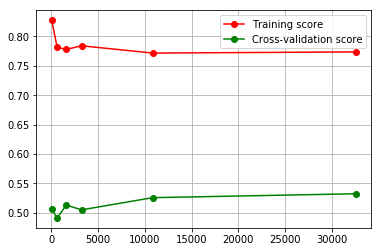

In [63]:
# BEGIN CODE HERE
import matplotlib.pyplot as plt

def learning_curve(X_train, X_test, y_train, y_test, classifier):
    train_scores=[]
    test_scores=[]
    num_of_data=[y_train.size//500, y_train.size//50, y_train.size//20, y_train.size//10, y_train.size//3, y_train.size]
    for i in range (0,6):
        X_train_less_data = X_train.iloc[0:num_of_data[i]-1]
        y_train_less_data = y_train[0:num_of_data[i]-1]
        
        classifier.fit(X_train_less_data,y_train_less_data)
        
        y_test_pred=classifier.predict(X_test)
        y_train_pred=classifier.predict(X_train_less_data)
        
        test_fScore = f1_score(y_test,y_test_pred)
        train_fScore = f1_score(y_train_less_data,y_train_pred)
        
        print("F1-score on test set: {:.5f}".format(test_fScore))
        print("F1-score on train set: {:.5f}".format(train_fScore))
        
        train_scores.append(train_fScore)
        test_scores.append(test_fScore)
    #plt.plot(num_of_data,train_scores,"r",num_of_data,test_scores,"g")
    
    plt.grid()
    plt.plot(num_of_data, train_scores, 'o-', color="r",
                 label="Training score")
    plt.plot(num_of_data, test_scores, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")


learning_curve(X_train,X_test,y_train,y_test,classifier)
    

#I should probalbly make a graph , shown the accuracy in every iteration of the classifier

#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

YOUR ANSWER HERE

**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

In [ ]:
# BEGIN CODE HERE
final_score = ""

#END CODE HERE